In [1]:
pip install pandas numpy matplotlib seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Sample_ Superstore.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Segment,0
Country,0
City,0
State,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False)

In [10]:
df = df.drop_duplicates()

/tmp/ipython-input-3710370579.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Category', y = 'Sales', data = df, estimator = sum, ci = None)


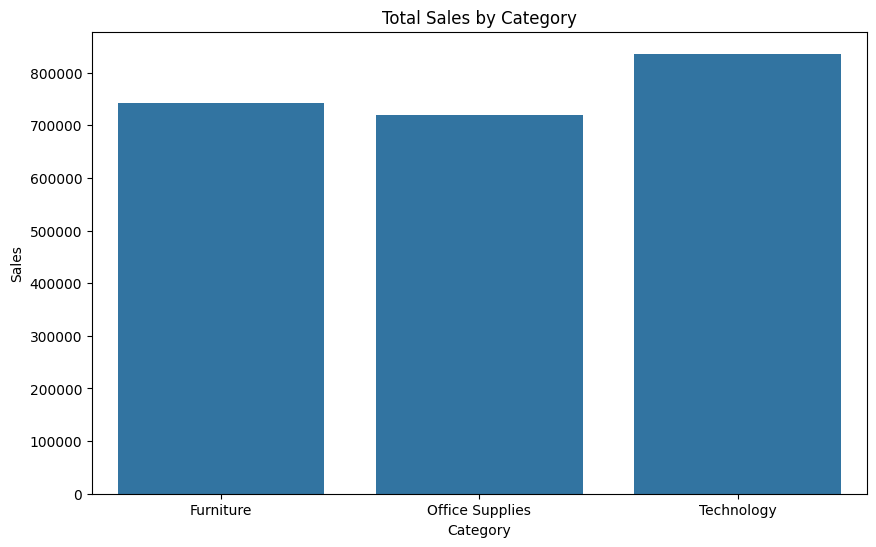

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Category', y = 'Sales', data = df, estimator = sum, ci = None)
plt.title("Total Sales by Category")
plt.show()